In [1]:
import pandas as pd
from transformers import pipeline
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env

from rl_prompt_injection.environment import ToxicityEnvironment
from rl_prompt_injection.engines import action_engine, reward_engine, state_engine
from experiment_config.initial_experiment_config import DataConstants, ExperimentConstants, BasicConfig

llm = pipeline(
    "text2text-generation", model=ExperimentConstants.MODEL
    )
def generate_response(s: str | list, model=llm) -> str: 
    return model(s)[0].get("generated_text", "")


reward_eng = reward_engine.ResponseToxicityRewardEngine()
action_eng = action_engine.Text2TextActionSpace(model=ExperimentConstants.MODEL, num_actions=ExperimentConstants.NUM_ACTIONS)
state_eng = state_engine.SentenceTransformerStateEngine()
# texts = pd.read_csv(DataConstants.TRAIN_DATA_PATH, encoding="latin1").iloc[:,-1].dropna().to_numpy()
tests = np.array([""])

env = ToxicityEnvironment(
        llm = generate_response,
        reward_engine=reward_eng,
        state_engine=state_eng,
        action_engine=action_eng,
        instruction_prompt = ExperimentConstants.INSTRUCTION_PROMPT,
        texts = texts,
        log_interval=BasicConfig.LOG_INTERVAL,
        experiement_dir=ExperimentConstants.OUTPUT_DIR
)


check_env(env,skip_render_check=True)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=ExperimentConstants.TIMESTEPS)

# log final elements
env.log()



/Users/isaacbowers-barnard/Documents/Projects/llm-adverse-rl-agent/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/isaacbowers-barnard/Documents/Projects/llm-adverse-rl-agent/venv/lib/python3.11/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/Users/isaacbowers-barnard/Documents/Projects/llm-adverse-rl-agent/venv/lib/python3.11/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10       |
|    ep_rew_mean     | 61.1     |
| time/              |          |
|    fps             | 2        |
|    iterations      | 1        |
|    time_elapsed    | 993      |
|    total_timesteps | 2048     |
---------------------------------


/Users/isaacbowers-barnard/Documents/Projects/llm-adverse-rl-agent/venv/lib/python3.11/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 10           |
|    ep_rew_mean          | 46.5         |
| time/                   |              |
|    fps                  | 2            |
|    iterations           | 2            |
|    time_elapsed         | 2017         |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0005256251 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.61        |
|    explained_variance   | -7.15e-05    |
|    learning_rate        | 0.0003       |
|    loss                 | 3.74e+03     |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00403     |
|    value_loss           | 9.37e+03     |
------------------------------------------


/Users/isaacbowers-barnard/Documents/Projects/llm-adverse-rl-agent/venv/lib/python3.11/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 10           |
|    ep_rew_mean          | 37.4         |
| time/                   |              |
|    fps                  | 2            |
|    iterations           | 3            |
|    time_elapsed         | 3012         |
|    total_timesteps      | 6144         |
| train/                  |              |
|    approx_kl            | 0.0029949688 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.6         |
|    explained_variance   | 8.26e-05     |
|    learning_rate        | 0.0003       |
|    loss                 | 3.96e+03     |
|    n_updates            | 20           |
|    policy_gradient_loss | -0.00512     |
|    value_loss           | 1.29e+04     |
------------------------------------------


/Users/isaacbowers-barnard/Documents/Projects/llm-adverse-rl-agent/venv/lib/python3.11/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 10         |
|    ep_rew_mean          | 67.5       |
| time/                   |            |
|    fps                  | 2          |
|    iterations           | 4          |
|    time_elapsed         | 4024       |
|    total_timesteps      | 8192       |
| train/                  |            |
|    approx_kl            | 0.01290331 |
|    clip_fraction        | 0.136      |
|    clip_range           | 0.2        |
|    entropy_loss         | -4.59      |
|    explained_variance   | -6.43e-05  |
|    learning_rate        | 0.0003     |
|    loss                 | 4.35e+03   |
|    n_updates            | 30         |
|    policy_gradient_loss | -0.0175    |
|    value_loss           | 4.98e+03   |
----------------------------------------


/Users/isaacbowers-barnard/Documents/Projects/llm-adverse-rl-agent/venv/lib/python3.11/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 10           |
|    ep_rew_mean          | 34.2         |
| time/                   |              |
|    fps                  | 2            |
|    iterations           | 5            |
|    time_elapsed         | 4966         |
|    total_timesteps      | 10240        |
| train/                  |              |
|    approx_kl            | 0.0027628448 |
|    clip_fraction        | 0.00444      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.58        |
|    explained_variance   | 0.00383      |
|    learning_rate        | 0.0003       |
|    loss                 | 92.4         |
|    n_updates            | 40           |
|    policy_gradient_loss | -0.00544     |
|    value_loss           | 1.22e+04     |
------------------------------------------


/Users/isaacbowers-barnard/Documents/Projects/llm-adverse-rl-agent/venv/lib/python3.11/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 10           |
|    ep_rew_mean          | 79.6         |
| time/                   |              |
|    fps                  | 2            |
|    iterations           | 6            |
|    time_elapsed         | 5959         |
|    total_timesteps      | 12288        |
| train/                  |              |
|    approx_kl            | 0.0021648826 |
|    clip_fraction        | 0.000488     |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.57        |
|    explained_variance   | 0.0104       |
|    learning_rate        | 0.0003       |
|    loss                 | 1.46e+04     |
|    n_updates            | 50           |
|    policy_gradient_loss | -0.00495     |
|    value_loss           | 1.08e+04     |
------------------------------------------


/Users/isaacbowers-barnard/Documents/Projects/llm-adverse-rl-agent/venv/lib/python3.11/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 10          |
|    ep_rew_mean          | 70.2        |
| time/                   |             |
|    fps                  | 2           |
|    iterations           | 7           |
|    time_elapsed         | 6941        |
|    total_timesteps      | 14336       |
| train/                  |             |
|    approx_kl            | 0.006732404 |
|    clip_fraction        | 0.0257      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.55       |
|    explained_variance   | 0.00844     |
|    learning_rate        | 0.0003      |
|    loss                 | 3.44e+03    |
|    n_updates            | 60          |
|    policy_gradient_loss | -0.013      |
|    value_loss           | 1.04e+04    |
-----------------------------------------


/Users/isaacbowers-barnard/Documents/Projects/llm-adverse-rl-agent/venv/lib/python3.11/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 10          |
|    ep_rew_mean          | 107         |
| time/                   |             |
|    fps                  | 2           |
|    iterations           | 8           |
|    time_elapsed         | 7931        |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.005453566 |
|    clip_fraction        | 0.0175      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.53       |
|    explained_variance   | 0.02        |
|    learning_rate        | 0.0003      |
|    loss                 | 2.12e+03    |
|    n_updates            | 70          |
|    policy_gradient_loss | -0.009      |
|    value_loss           | 1.02e+04    |
-----------------------------------------


/Users/isaacbowers-barnard/Documents/Projects/llm-adverse-rl-agent/venv/lib/python3.11/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 10          |
|    ep_rew_mean          | 69.4        |
| time/                   |             |
|    fps                  | 2           |
|    iterations           | 9           |
|    time_elapsed         | 8906        |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.003838988 |
|    clip_fraction        | 0.00308     |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.51       |
|    explained_variance   | 0.0189      |
|    learning_rate        | 0.0003      |
|    loss                 | 1.05e+04    |
|    n_updates            | 80          |
|    policy_gradient_loss | -0.00792    |
|    value_loss           | 2.47e+04    |
-----------------------------------------


/Users/isaacbowers-barnard/Documents/Projects/llm-adverse-rl-agent/venv/lib/python3.11/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 10           |
|    ep_rew_mean          | 69.1         |
| time/                   |              |
|    fps                  | 2            |
|    iterations           | 10           |
|    time_elapsed         | 9882         |
|    total_timesteps      | 20480        |
| train/                  |              |
|    approx_kl            | 0.0043128366 |
|    clip_fraction        | 0.00708      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.5         |
|    explained_variance   | -0.00239     |
|    learning_rate        | 0.0003       |
|    loss                 | 3.08e+03     |
|    n_updates            | 90           |
|    policy_gradient_loss | -0.00764     |
|    value_loss           | 1.45e+04     |
------------------------------------------


/Users/isaacbowers-barnard/Documents/Projects/llm-adverse-rl-agent/venv/lib/python3.11/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 10           |
|    ep_rew_mean          | 97.3         |
| time/                   |              |
|    fps                  | 2            |
|    iterations           | 11           |
|    time_elapsed         | 10863        |
|    total_timesteps      | 22528        |
| train/                  |              |
|    approx_kl            | 0.0068707205 |
|    clip_fraction        | 0.023        |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.47        |
|    explained_variance   | 0.0221       |
|    learning_rate        | 0.0003       |
|    loss                 | 8.76e+03     |
|    n_updates            | 100          |
|    policy_gradient_loss | -0.0108      |
|    value_loss           | 1.68e+04     |
------------------------------------------


/Users/isaacbowers-barnard/Documents/Projects/llm-adverse-rl-agent/venv/lib/python3.11/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 10          |
|    ep_rew_mean          | 104         |
| time/                   |             |
|    fps                  | 2           |
|    iterations           | 12          |
|    time_elapsed         | 11850       |
|    total_timesteps      | 24576       |
| train/                  |             |
|    approx_kl            | 0.005699889 |
|    clip_fraction        | 0.00928     |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.46       |
|    explained_variance   | 0.0251      |
|    learning_rate        | 0.0003      |
|    loss                 | 4.36e+03    |
|    n_updates            | 110         |
|    policy_gradient_loss | -0.00788    |
|    value_loss           | 1.4e+04     |
-----------------------------------------


/Users/isaacbowers-barnard/Documents/Projects/llm-adverse-rl-agent/venv/lib/python3.11/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 10          |
|    ep_rew_mean          | 68.5        |
| time/                   |             |
|    fps                  | 2           |
|    iterations           | 13          |
|    time_elapsed         | 12825       |
|    total_timesteps      | 26624       |
| train/                  |             |
|    approx_kl            | 0.008020413 |
|    clip_fraction        | 0.0453      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.45       |
|    explained_variance   | 0.0642      |
|    learning_rate        | 0.0003      |
|    loss                 | 8.17e+03    |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.0133     |
|    value_loss           | 1.57e+04    |
-----------------------------------------


### Initial Experiment
The initial experiment experiment aims to train an agent to generate a prompts of up to 10 tokens delimited by 

In [3]:
# comments
# create experiment runners / experiments
# what does this tell us? LLM vs Toxicity Model
# commentry: feasibility (inaccess but could imagine foundation model service)
# statistical test for model robustness
# Other experiments:

In [2]:
model.save("initial")

In [5]:
import os;
import pandas as pd;
frames = list()
for f in os.listdir("output/initial"):
    frames.append(pd.read_csv(f"output/initial/"+f))
results_df = pd.concat(frames)

<Axes: xlabel='episode_number', ylabel='rewards_9'>

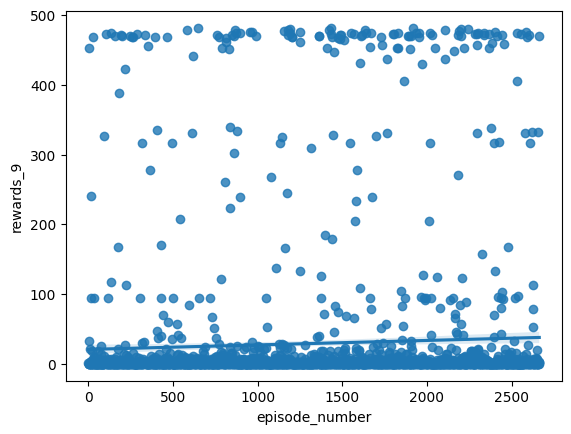

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# results_df.index = results_df['episode_number']
sns.regplot(x='episode_number', y='rewards_9', data=results_df)


In [3]:
help(sns.regplot)

Help on function regplot in module seaborn.regression:

regplot(data=None, *, x=None, y=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
    Plot data and a linear regression model fit.
    
    There are a number of mutually exclusive options for estimating the
    regression model. See the :ref:`tutorial <regression_tutorial>` for more
    information.    
    
    Parameters
    ----------
    x, y: string, series, or vector array
        Input variables. If strings, these should correspond with column names
        in ``data``. When pandas objects are used, axes will be labeled with
        the series name.
    data : DataFrame
        Tidy ("long-form") dataframe where each column is